# Final Part II - Classification problem

The given problem is again a churn prediction problem. We are provided with 85 features and the last column gives the churn. We are provided with three files.

- data_test.txt -- contains the testing data (85 features)
- data_train.txt -- contains the training data(85 features) along with the target values
- Target_data.txt -- contains only the target values for testing

Your job is to do the following (not necessary in the sequence given):

- Read data from the files
- (optional) Some data analysis for data understanding
- Split into training and testing
- Do the preprocessing if any
- Apply various models
- Feature engineering if required
- Feature Selection if required
- Hyper-parameter tuning for the models you selected
- Get the accuracy of the each model and then do comparisons to choose the best model, features, hyperparameters


You will be marked on completeness, better results and your conclusion. Please make heading for each section you are doing to make it readable.

Final answer -  Best Model with hyperparameters and selected features

- It is not necessary to perform the steps in the sequence I wrote. You can choose any sequence to get to the results. 



Roll no:MSCSF18M528

In [1]:
import numpy as np
np.set_printoptions(threshold=np.inf)
import matplotlib.pyplot as plt
import pandas as pd
import csv
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import copy
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
#change txt files into csv

In [3]:
#with open('data_train.txt', 'r') as in_file:
 #   stripped = (line.strip() for line in in_file)
  #  lines = (line.split(",") for line in stripped if line)
   # with open('data_train.csv', 'w') as out_file:
    #    writer = csv.writer(out_file)
     #   writer.writerow(('title', 'intro'))
      #  writer.writerows(lines)

In [4]:
#read csv files

In [5]:
# Read csv
data_train = pd.read_csv("data_train.csv", header=None)
test_X = pd.read_csv("data_test.csv", header=None)
test_Y = pd.read_csv("Target_data.csv", header=None)

In [6]:
data_train.head()

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


In [7]:
test_Y.head()

,0
0,0
1,1
2,0
3,0
4,0


In [8]:
test_Y.shape

(4000, 1)

In [10]:
test_X.shape

(4000, 85)

In [11]:
data_train.shape

(5822, 86)

In [12]:
#test train splip is already done just have to set the data

In [13]:
#Last column of data_train is target
train_X = data_train.drop(data_train.columns[len(data_train.columns)-1], axis=1)
train_Y = data_train[data_train.columns[-1]]

In [14]:
#Convert target df into arrays of 1-D 'cz models needs 1-d arrays
test_Y_1D = np.array(test_Y).reshape(test_Y.shape[0])
train_Y_1D = np.array(train_Y).reshape(train_Y.shape[0])

In [15]:
train_X.shape

(5822, 85)

In [16]:
train_Y_1D.shape

(5822,)

In [17]:


# test train Split

In [18]:
train_X.head()

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,0,1,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,0,1,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,0,1,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,0,1,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,0,1,0,0,0,0,0


In [19]:
train_Y_1D

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [20]:
test_X.head()

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
0,33,1,4,2,8,0,6,0,3,5,...,0,0,0,0,1,0,0,0,0,0
1,6,1,3,2,2,0,5,0,4,5,...,2,0,0,0,1,0,0,0,0,0
2,39,1,3,3,9,1,4,2,3,5,...,1,0,0,0,1,0,0,0,0,0
3,9,1,2,3,3,2,3,2,4,5,...,0,0,0,0,1,0,0,0,0,0
4,31,1,2,4,7,0,2,0,7,9,...,0,0,0,0,1,0,0,0,0,0


In [21]:
test_Y_1D

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [25]:
train_col = train_X.columns.values
test_col = test_X.columns.values
scaler = preprocessing.MinMaxScaler()
#MinMax scaling at traing data
scalX_train = scaler.fit_transform(train_X)
scalX_train = pd.DataFrame(scalX_train, columns = train_col)

#MinMax scaling at testing data
scalX_test = scaler.transform(test_X)
scalX_test = pd.DataFrame(scalX_test, columns = test_col)

In [26]:
scalX_train.head()

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
0,0.800,0.0,0.50,0.2,0.777778,0.000000,0.555556,0.2,0.333333,0.777778,...,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0
1,0.900,0.0,0.25,0.2,0.777778,0.111111,0.444444,0.2,0.444444,0.666667,...,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0
2,0.900,0.0,0.25,0.2,0.777778,0.000000,0.444444,0.4,0.444444,0.333333,...,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0
3,0.200,0.0,0.50,0.4,0.222222,0.222222,0.333333,0.4,0.444444,0.555556,...,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0
4,0.975,0.0,0.75,0.2,1.000000,0.111111,0.444444,0.2,0.444444,0.777778,...,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0


In [27]:
scalX_test.head()

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
0,0.800,0.0,0.75,0.2,0.777778,0.000000,0.666667,0.0,0.333333,0.555556,...,0.000,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0
1,0.125,0.0,0.50,0.2,0.111111,0.000000,0.555556,0.0,0.444444,0.555556,...,0.250,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0
2,0.950,0.0,0.50,0.4,0.888889,0.111111,0.444444,0.4,0.333333,0.555556,...,0.125,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0
3,0.200,0.0,0.25,0.4,0.222222,0.222222,0.333333,0.4,0.444444,0.555556,...,0.000,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0
4,0.750,0.0,0.25,0.6,0.666667,0.000000,0.222222,0.0,0.777778,1.000000,...,0.000,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0


In [28]:
#or we can doo scalling like this its our choice
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
test_X = sc.transform(test_X)

In [29]:
#now applying diffrent models without hyper paramaeter tuning

In [32]:
#Without Hyper Parameters Tuning
#DesicionTree
#making the instance
model= DecisionTreeClassifier(random_state=1234)
#learning
model.fit(scalX_train,train_Y_1D)
#Prediction
prediction=model.predict(scalX_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,test_Y_1D))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,test_Y_1D))

Accuracy: 0.88975
Confusion Metrix:
 [[3525  204]
 [ 237   34]]


In [33]:
#Without Hyper Parameters Tuning
#Randomforest
#making the instance
model=RandomForestClassifier(n_jobs=-1,random_state=123)
#learning
model.fit(scalX_train,train_Y_1D)
#Prediction
prediction=model.predict(scalX_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,test_Y_1D))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,test_Y_1D))

Accuracy: 0.93275
Confusion Metrix:
 [[3712  219]
 [  50   19]]


In [34]:
#Without Hyper Parameters Tuning
#SVM
#making the instance
model = svm.SVC(random_state=123)
#learning
model.fit(scalX_train,train_Y_1D)
#Prediction
prediction=model.predict(scalX_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,test_Y_1D))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,test_Y_1D))

Accuracy: 0.9405
Confusion Metrix:
 [[3762  238]
 [   0    0]]


In [36]:
#Hyper parameter tunning 
#DesicionTree
#making the instance
model= DecisionTreeClassifier(random_state=1234)
#Hyper Parameters Set
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'random_state':[123]}

In [37]:
#With Hyper Parameters Tuning
#Randomforest
#importing modules

#making the instance
model=RandomForestClassifier()
#hyper parameters set
params = {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[123],
          'n_jobs':[-1]}

In [38]:
#With Hyper Parameters Tuning
#SVM
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn import svm
#making the instance
model=svm.SVC()
#Hyper Parameters Set
params = {'C': [6,7,8,9,10,11,12], 
          'kernel': ['linear','rbf']}

In [39]:
#Get the accuracy results with Cross-validation

In [40]:
#model with best accuracy cehck
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#Learning
model1.fit(scalX_train,train_Y_1D)
#The best hyper parameters set
print("Best Hyper Parameters:",model1.best_params_)
#Prediction
prediction=model1.predict(scalX_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,test_Y_1D))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,test_Y_1D))

Best Hyper Parameters: {'C': 6, 'kernel': 'linear'}
Accuracy: 0.9405
Confusion Metrix:
 [[3762  238]
 [   0    0]]


In [41]:
#logistic regression and svm are giving best accuracy

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


X.shape: (26, 2)


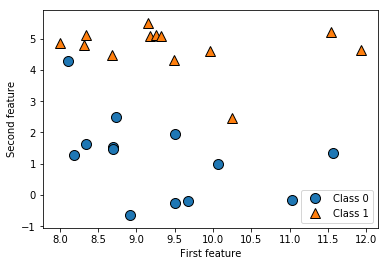

In [42]:
import mglearn
# generate dataset
scalX_train, scalX_test = mglearn.datasets.make_forge()
# plot dataset
mglearn.discrete_scatter(scalX_train[:, 0], scalX_train[:, 1], scalX_test)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape:", scalX_train.shape)